# ALP Data Mining
Jefferson Mourent / 0706022110008

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

### Data Preparation

In [2]:
df = pd.read_csv('data.csv', delimiter=';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
# Cek Missing Value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

>#### Tidak ada missing value

In [4]:
#Cek Duplicate
print(f"Duplicate: {df.duplicated().sum()}")

Duplicate: 0


In [5]:
#Encode Kolom Target
label_encoder = LabelEncoder()

df['Target'] = label_encoder.fit_transform(df['Target'])
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [6]:
#Scaling kolom
kolomScale = df.select_dtypes(include=['float64', 'int64']).columns.drop(['Target'], errors='ignore')
scaler = StandardScaler()

df_new = df.copy()
df_new[kolomScale] = scaler.fit_transform(df_new[kolomScale])
df_new.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,-0.294829,-0.095470,2.490896,-4.209520,0.350082,-0.35023,-0.804841,-0.126298,-0.036018,-0.669778,...,-0.282442,-2.838337,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,0
1,-0.294829,-0.209869,-0.554068,0.192580,0.350082,-0.35023,2.076819,-0.126298,-1.189759,-1.256427,...,-0.282442,-0.105726,-0.522682,0.518904,0.659562,-0.199441,0.876222,-1.105222,0.347199,2
2,-0.294829,-1.010660,2.490896,0.103404,0.350082,-0.35023,-0.804841,-0.126298,1.117723,0.959802,...,-0.282442,-0.105726,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,0
3,-0.294829,-0.095470,0.207173,0.444115,0.350082,-0.35023,-0.804841,-0.126298,1.181819,0.959802,...,-0.282442,-0.105726,0.490616,0.187165,0.416450,-0.199441,-0.813253,-1.466871,-1.375511,2
4,1.356212,1.162916,-0.554068,-0.408389,-2.856470,-0.35023,-2.473171,-0.126298,1.117723,1.024985,...,-0.282442,-0.105726,-0.522682,0.518904,0.531608,-0.199441,0.876222,-1.105222,0.347199,2


### EDA

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/evening attendance\t,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


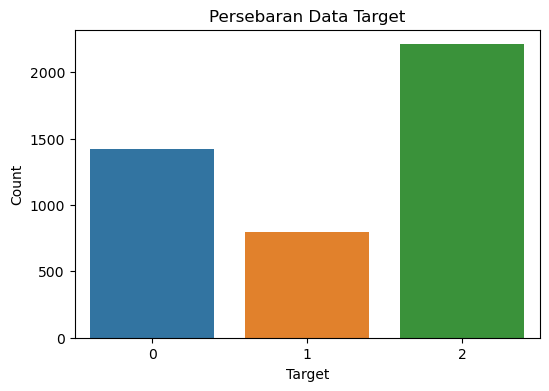

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Target', data=df)
plt.title('Persebaran Data Target')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

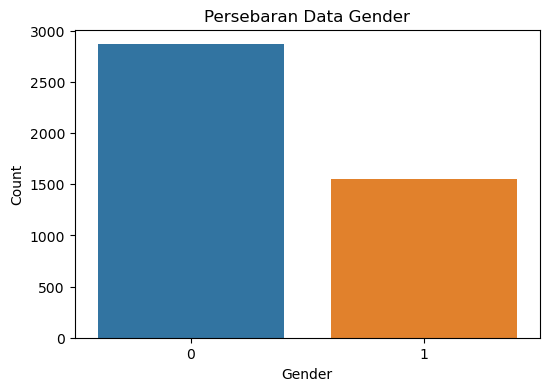

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Persebaran Data Gender')
plt.show()

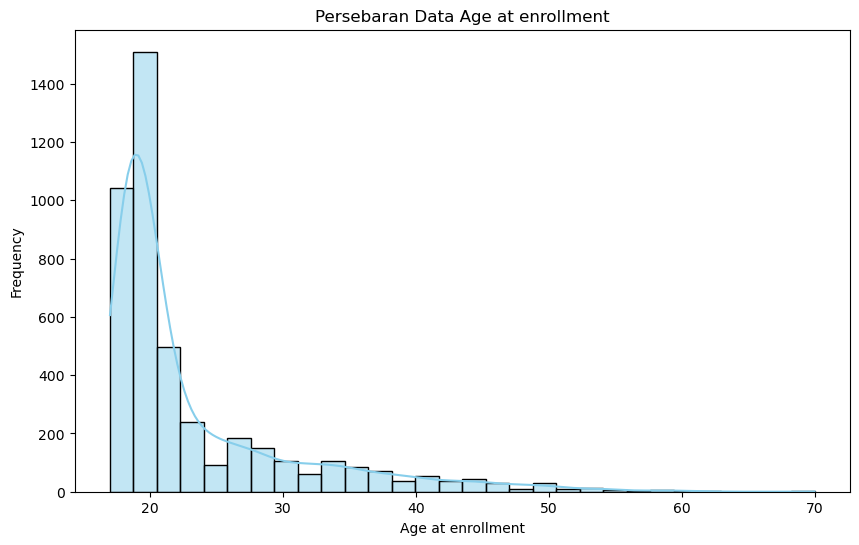

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age at enrollment'], bins=30, kde=True, color='skyblue')
plt.xlabel('Age at enrollment')
plt.ylabel('Frequency')
plt.title('Persebaran Data Age at enrollment')
plt.show()

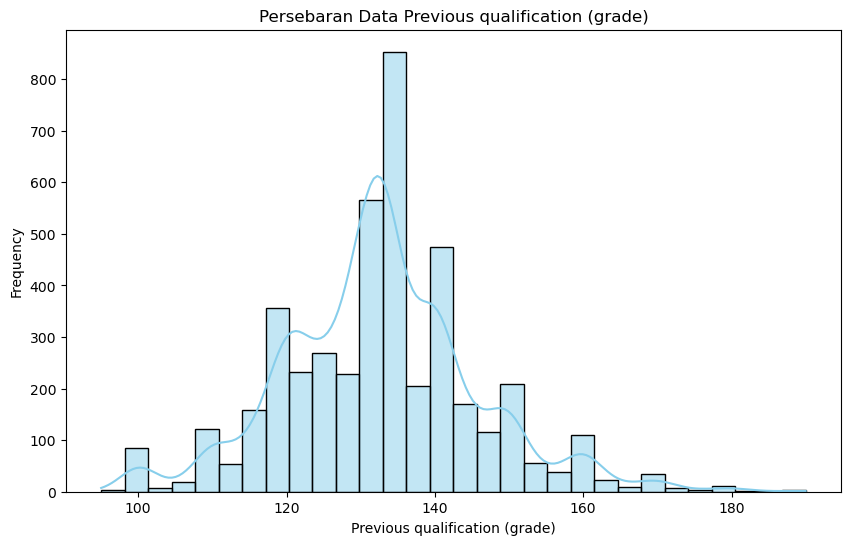

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Previous qualification (grade)'], bins=30, kde=True, color='skyblue')
plt.xlabel('Previous qualification (grade)')
plt.ylabel('Frequency')
plt.title('Persebaran Data Previous qualification (grade)')
plt.show()

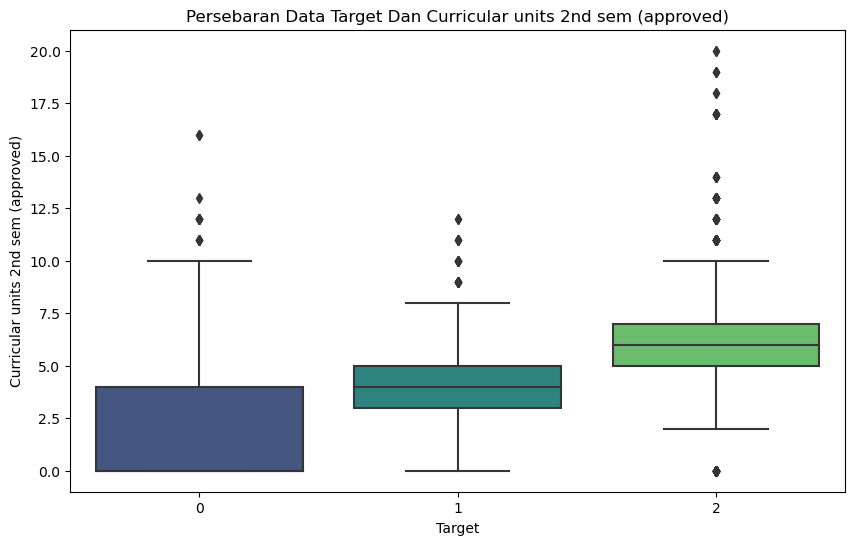

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Curricular units 2nd sem (approved)', data=df, palette='viridis')
plt.xlabel('Target')
plt.ylabel('Curricular units 2nd sem (approved)')
plt.title('Persebaran Data Target Dan Curricular units 2nd sem (approved)')
plt.show()

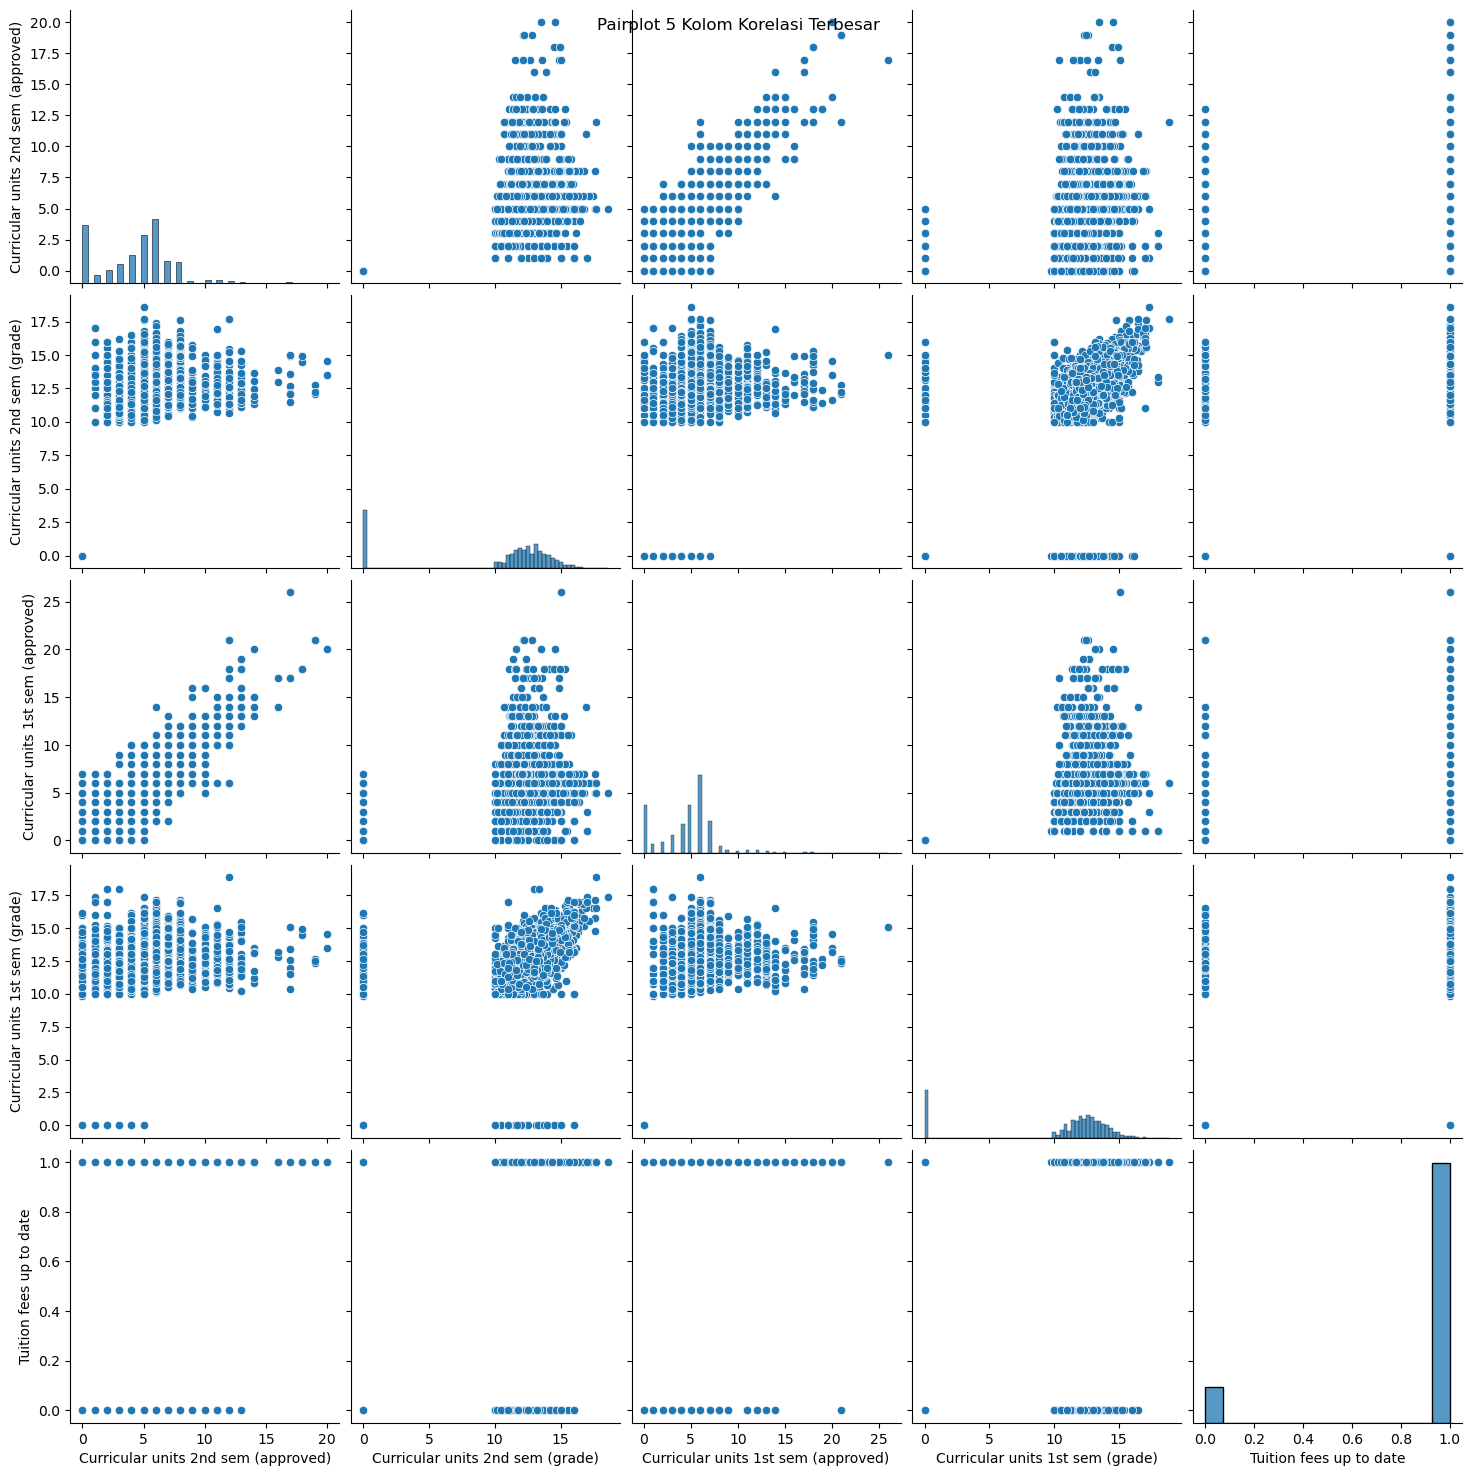

In [13]:
cols_df = ['Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Tuition fees up to date']
sns.pairplot(df[cols_df], height=3, aspect=1)
plt.suptitle('Pairplot 5 Kolom Korelasi Terbesar')
plt.show()

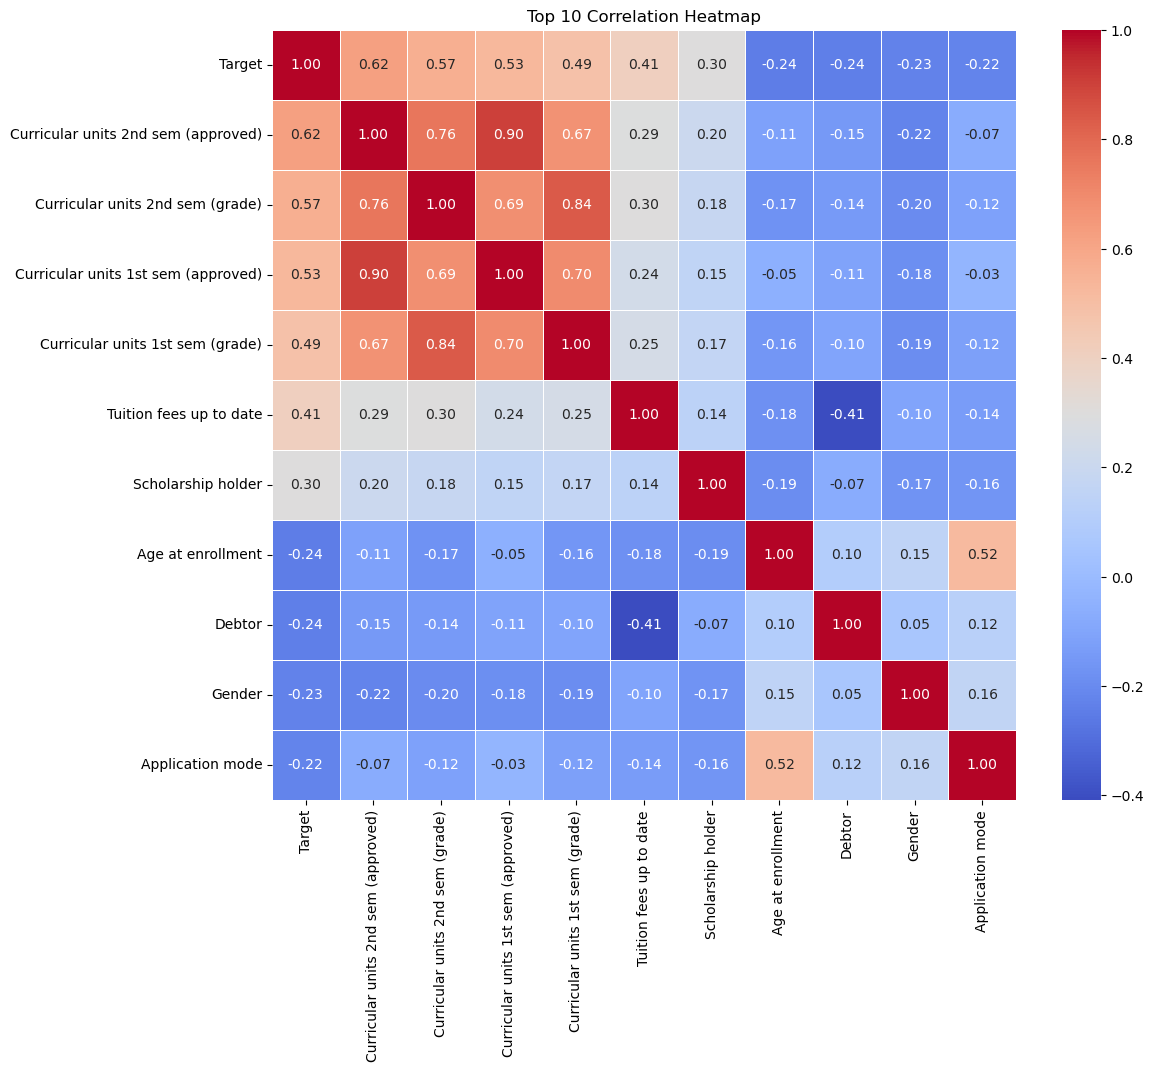

In [14]:
correlation_matrix = df_new.corr()
top_corr_columns = correlation_matrix['Target'].abs().nlargest(11).index
top_corr_matrix = df[top_corr_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Top 10 Correlation Heatmap')
plt.show()

### Clustering
Dengan K-Means

In [15]:
df_kmeans = df_new.copy()
df_hie = df_new.copy()

C:\Users\Jefferson\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Jefferson\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Jefferson\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Jefferson\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

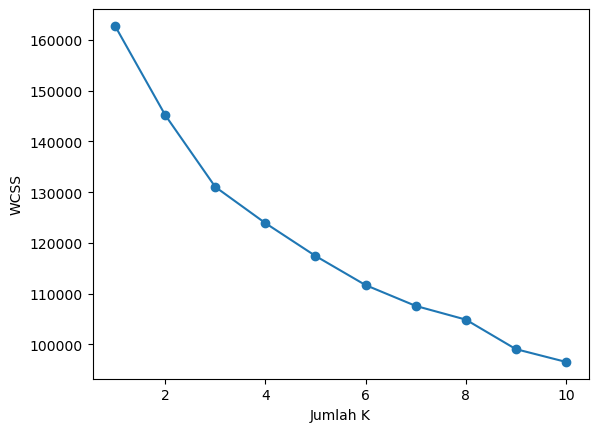

In [16]:
from sklearn.cluster import KMeans

wcss = []
k_values = range(1, 11)

# Melakukan K-means clustering untuk setiap nilai k dan menghitung inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_kmeans)
    wcss.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Jumlah K')
plt.ylabel('WCSS')
plt.show()

In [17]:
from kneed import KneeLocator
findknee = KneeLocator(range(1, 11),
                       wcss,
                       curve="convex",
                       direction="decreasing")
print('Best cluster is :', findknee.elbow)

Best cluster is : 3


In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df_kmeans['Cluster'] = kmeans.fit_predict(df_kmeans)

C:\Users\Jefferson\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [19]:
cluster_kmeans_stats = df_kmeans.groupby('Cluster').agg({
    'Marital status': 'mean',  
    'Application mode': 'mean',  
    'Previous qualification': 'mean', 
    'Admission grade': 'mean',
    'Tuition fees up to date': lambda x: x.mode().iloc[0],
    'Scholarship holder': lambda x: x.mode().iloc[0],
    'Age at enrollment': 'mean', 
    'Curricular units 1st sem (approved)': 'mean',
    'Curricular units 1st sem (grade)': 'mean', 
    'Curricular units 2nd sem (approved)': 'mean',
    'Curricular units 2nd sem (grade)': 'mean', 
    'GDP': 'mean', 
    'Target': lambda x: x.mode().iloc[0] 
})
cluster_kmeans_stats

,Marital status,Application mode,Previous qualification,Admission grade,Tuition fees up to date,Scholarship holder,Age at enrollment,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),GDP,Target
Cluster,,,,,,,,,,,,,
0,-0.057733,-0.139108,-0.048641,-0.002643,0.368135,-0.574914,-0.167239,0.184582,0.433788,0.236232,0.458097,0.029355,2
1,0.204596,0.824402,0.493862,0.156685,0.368135,-0.574914,0.720235,2.220478,0.411140,1.811621,0.464400,0.007599,2
2,0.146190,0.247726,0.021778,-0.039769,0.368135,-0.574914,0.383249,-1.373977,-1.712916,-1.433550,-1.818439,-0.109537,0


Dengan Hierarchical

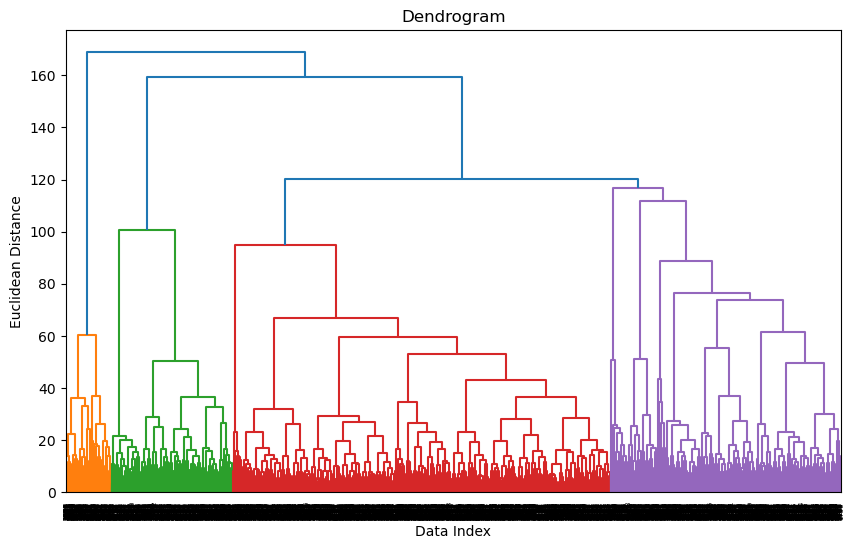

In [20]:
import scipy.cluster.hierarchy as sch

dist_matrix = sch.linkage(df_hie, method='ward', metric='euclidean')

# Membuat dendrogram
plt.figure(figsize=(10, 6))
sch.dendrogram(dist_matrix)
plt.xlabel('Data Index')
plt.ylabel('Euclidean Distance')
plt.title('Dendrogram')
plt.show()

In [25]:
from sklearn.cluster import AgglomerativeClustering

agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
df_hie['Cluster'] = agg_cluster.fit_predict(df_hie)

In [26]:
cluster_hie_stats = df_hie.groupby('Cluster').agg({
    'Marital status': 'mean',  
    'Application mode': 'mean',  
    'Previous qualification': 'mean', 
    'Admission grade': 'mean',
    'Tuition fees up to date': lambda x: x.mode().iloc[0],
    'Scholarship holder': lambda x: x.mode().iloc[0],
    'Age at enrollment': 'mean', 
    'Curricular units 1st sem (approved)': 'mean',
    'Curricular units 1st sem (grade)': 'mean', 
    'Curricular units 2nd sem (approved)': 'mean',
    'Curricular units 2nd sem (grade)': 'mean', 
    'GDP': 'mean', 
    'Target': lambda x: x.mode().iloc[0] 
})
cluster_hie_stats

,Marital status,Application mode,Previous qualification,Admission grade,Tuition fees up to date,Scholarship holder,Age at enrollment,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),GDP,Target
Cluster,,,,,,,,,,,,,
0,0.002244,-0.090869,-0.025282,-0.009188,0.368135,-0.574914,-0.097429,0.111515,0.333686,0.152633,0.339227,0.028767,2
1,0.192260,0.812926,0.351885,0.182493,0.368135,-0.574914,0.730128,2.233519,0.417704,1.820437,0.471782,-0.024383,2
2,-0.083400,0.148142,-0.005992,-0.022684,0.368135,-0.574914,0.211974,-1.395226,-1.821931,-1.445274,-1.869894,-0.134389,0


### Classification

In [44]:
df_class = df_new.copy()

In [45]:
X = df_class.drop(['Target'], axis=1)
y = df_class['Target']

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Dengan LogisticRegression

In [48]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)

classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [49]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 2 2 2 0 1 2 2 2 2 1 2 0 2 2 2 2 2 0 2 2 0 0 2 2 2 0 0 1 0 1 0 0 0 0 2 2
 2 2 1 0 0 1 0 0 2 2 2 2 2 2 2 0 0 1 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2
 2 2 2 2 2 2 0 0 2 0 2 0 2 2 2 2 0 2 2 2 0 1 0 2 0 0 2 2 1 0 0 1 2 0 1 2 0
 2 2 2 1 2 2 2 2 0 2 0 0 2 1 0 2 0 2 2 2 2 2 0 2 2 0 2 0 1 1 0 2 2 2 2 2 2
 0 2 2 0 1 2 0 2 2 2 0 2 2 2 2 2 1 2 0 1 2 0 2 2 2 2 0 2 1 0 2 2 0 2 0 0 2
 0 0 2 2 0 2 0 0 0 2 2 2 2 0 2 0 2 2 2 2 0 2 0 2 2 2 0 2 2 2 2 2 1 0 1 2 2
 0 2 0 0 2 0 0 2 2 0 1 0 2 0 0 2 2 2 2 0 0 0 2 0 0 0 2 1 2 2 2 2 2 2 0 2 2
 2 2 2 0 0 2 2 2 2 2 0 0 2 0 0 2 2 2 1 2 2 2 2 1 0 0 1 1 1 0 0 0 2 0 2 2 2
 2 2 0 2 2 0 1 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 2 0 1 1 2 2 0 1
 0 2 2 1 0 2 1 2 0 0 2 0 0 0 2 0 2 2 0 0 0 2 0 0 2 1 2 1 2 2 0 2 0 2 2 2 0
 2 2 0 2 0 2 2 0 1 0 2 2 0 0 0 2 2 0 2 0 1 0 2 1 2 0 1 0 1 2 2 0 0 2 2 2 2
 2 2 2 2 2 0 2 2 0 0 2 2 2 0 0 2 2 2 2 0 0 1 1 0 0 0 2 2 0 2 0 2 2 2 0 2 2
 2 2 2 0 2 2 1 1 1 1 0 1 2 0 2 0 2 2 2 2 2 0 0 2 0 2 0 2 1 2 2 2 2 2 1 0 0
 2 1 0 0 0 0 0 2 2 1 2 2 

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score

lr_acc = accuracy_score(y_test, y_pred)
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("Accuracy Score : ", accuracy_score(y_test, y_pred))

Confusion Matrix : 
 [[244  27  45]
 [ 35  42  74]
 [ 14  24 380]]
Accuracy Score :  0.752542372881356


#### Dengan NaiveBaiyes

In [51]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [52]:
y_pred = naive_bayes.predict(X_test)
print(y_pred)

[0 2 2 2 0 1 2 2 2 2 2 2 2 2 2 0 2 2 1 2 2 0 0 1 2 2 0 2 2 0 2 0 2 0 0 2 2
 1 2 2 0 1 2 0 0 2 2 2 2 2 1 2 0 1 1 0 1 1 2 2 0 2 2 2 2 2 2 2 2 0 2 2 0 2
 2 0 2 2 2 2 0 2 2 0 2 2 2 2 2 2 0 1 2 2 1 1 0 2 0 0 2 2 2 0 1 2 2 0 1 2 0
 2 2 2 2 2 2 0 2 0 1 1 0 2 1 0 2 0 2 2 1 0 2 2 2 2 0 2 0 1 1 0 2 2 2 2 2 2
 0 1 1 0 2 2 0 2 2 2 0 0 2 2 1 2 2 2 0 2 1 0 2 2 2 2 0 2 2 0 2 2 0 2 0 0 2
 0 0 2 1 0 2 1 0 2 2 2 2 2 0 2 0 2 0 2 2 0 2 0 2 2 2 0 2 2 2 2 1 0 0 2 2 2
 0 2 0 0 2 0 0 2 2 0 2 0 2 1 0 2 2 2 2 0 2 1 2 0 1 0 2 2 2 2 2 2 1 2 0 2 2
 2 2 2 0 0 2 2 2 2 2 0 0 1 0 0 2 1 1 1 2 2 2 2 1 0 0 1 2 0 2 0 0 2 0 1 2 2
 0 1 0 2 2 0 1 1 0 2 2 2 2 2 2 0 2 2 0 0 2 2 2 2 2 0 2 0 0 1 0 2 2 2 2 0 2
 1 2 2 1 0 2 1 2 1 0 2 0 0 0 2 1 2 2 0 1 0 2 0 0 2 1 2 2 2 2 0 2 0 2 2 1 2
 2 2 0 2 0 2 2 0 1 0 2 2 0 0 0 2 2 2 2 0 2 0 2 2 2 0 2 0 1 2 2 0 0 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 0 0 1 2 2 2 0 0 1 1 0 0 0 2 2 0 2 2 2 2 2 0 2 2
 2 2 1 0 0 2 2 1 2 2 0 2 2 0 2 0 2 1 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 0 2 2 0
 2 2 0 0 0 0 0 2 2 1 2 1 

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score

nb_acc = accuracy_score(y_test, y_pred)
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("Accuracy Score : ", accuracy_score(y_test, y_pred))

Confusion Matrix : 
 [[216  34  66]
 [ 28  38  85]
 [ 24  35 359]]
Accuracy Score :  0.6926553672316385


#### Dengan (K-NN) Classifier

In [54]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [55]:
y_pred = knn.predict(X_test)
print(y_pred)

[0 2 2 1 0 2 2 0 2 2 2 2 2 2 2 0 2 2 1 2 2 0 0 2 2 2 0 2 1 0 2 0 0 0 0 1 2
 2 2 0 0 0 2 0 0 2 2 2 2 2 1 2 0 0 1 2 2 2 2 2 0 2 2 2 2 2 2 2 1 0 2 2 0 2
 2 0 2 2 2 2 0 2 2 2 2 1 2 2 2 2 0 2 2 2 1 0 0 0 0 0 2 2 1 0 1 1 2 0 1 2 0
 2 2 2 2 2 2 2 2 0 2 0 0 2 1 0 2 0 2 2 2 2 2 2 2 2 0 2 0 1 0 0 2 2 2 1 2 2
 0 2 1 0 1 2 0 2 2 2 0 2 2 2 2 2 1 2 0 1 2 1 2 1 1 2 0 2 1 0 2 2 0 2 0 0 2
 0 0 1 2 0 1 0 0 1 2 0 2 2 0 2 0 2 2 2 2 0 2 2 2 2 1 0 2 2 2 2 2 0 0 2 2 2
 0 2 0 0 2 0 2 2 2 0 0 0 2 1 0 2 2 1 2 0 0 1 2 0 1 0 2 1 2 2 2 2 2 2 0 2 2
 1 2 2 0 0 2 2 2 2 2 0 0 2 0 0 2 2 2 1 2 2 2 2 2 0 0 0 2 1 0 0 0 2 0 2 2 2
 0 2 0 2 2 2 1 2 0 2 2 2 2 2 1 1 1 2 2 2 2 2 2 1 2 0 2 0 1 1 0 2 2 2 2 0 0
 0 2 2 0 0 2 2 2 1 0 2 0 0 2 2 0 2 2 0 0 1 1 0 0 2 1 2 2 2 2 0 2 0 2 2 2 0
 2 2 0 1 0 2 2 0 0 0 1 2 1 0 0 2 2 2 2 0 1 0 2 2 2 0 2 0 1 2 2 1 0 2 2 2 2
 2 2 2 2 2 1 2 2 1 1 2 2 2 0 0 1 2 2 2 0 0 2 0 0 1 0 2 2 0 2 1 2 2 2 0 2 2
 2 2 2 1 1 2 0 1 2 2 2 2 2 0 2 0 2 2 2 2 2 1 0 2 0 2 0 2 2 2 2 1 2 2 2 2 0
 2 2 0 0 0 0 0 2 2 1 2 2 

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score

knn_acc = accuracy_score(y_test, y_pred)
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("Accuracy Score : ", accuracy_score(y_test, y_pred))

Confusion Matrix : 
 [[216  39  61]
 [ 29  43  79]
 [ 22  34 362]]
Accuracy Score :  0.7016949152542373


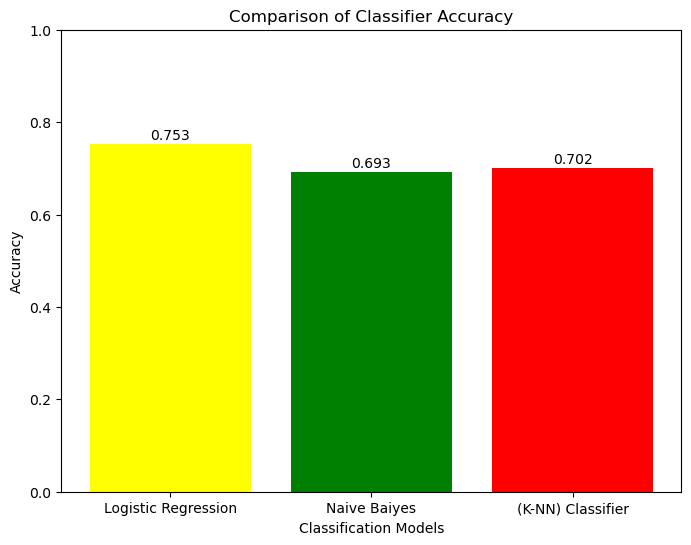

In [57]:
accuracy = [lr_acc, nb_acc, knn_acc]
models = ['Logistic Regression', 'Naive Baiyes','(K-NN) Classifier']

plt.figure(figsize=(8, 6))
plt.bar(models, accuracy, color=['yellow', 'green', 'red'])
for i, acc in enumerate(accuracy):
    plt.text(i, acc + 0.01, f'{acc:.3f}', ha='center', color='black', fontsize=10)
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Classifier Accuracy')
plt.ylim(0, 1)
plt.show()